In [3]:
%matplotlib inline

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yellowbrick as yb
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [3]:
def load_tic_toe_data(data_path='./data/tic-tac-toe/tic-tac-toe.data'):
    return pd.read_csv(data_path)

In [6]:
tic_tac_toe_data = load_tic_toe_data()

for col_name in tic_tac_toe_data.columns:
#     print(tic_tac_toe_data[col_name].dtype)
    if(tic_tac_toe_data[col_name].dtype == 'object'):
        tic_tac_toe_data[col_name]= tic_tac_toe_data[col_name].astype('category')
        tic_tac_toe_data[col_name] = tic_tac_toe_data[col_name].cat.codes
tic_tac_toe_data_nolables = tic_tac_toe_data.drop('positive', axis=1)
tic_tac_toe_data_nolables.describe()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,1.221526,1.132706,1.221526,1.132706,1.311390,1.133751,1.221526,1.133751,1.222571
std,0.775566,0.798892,0.775566,0.798892,0.741201,0.799372,0.775566,0.799372,0.775941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist_X, mnist_y = mnist["data"], mnist["target"].astype(np.uint8)
print(mnist_X.shape, mnist_y.shape)

(70000, 784) (70000,)


In [16]:
kmeans = KMeans(random_state=42) #.fit(X=tic_tac_toe_data_nolables)

TypeError: __init__() got an unexpected keyword argument 'k'

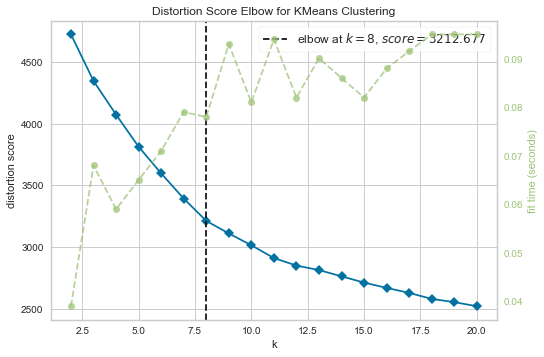

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

In [35]:
kelbow_visualizer(kmeans, tic_tac_toe_data_nolables, k=20)

In [26]:
from sklearn.model_selection import train_test_split
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_X, mnist_y, test_size=.1, random_state=42)

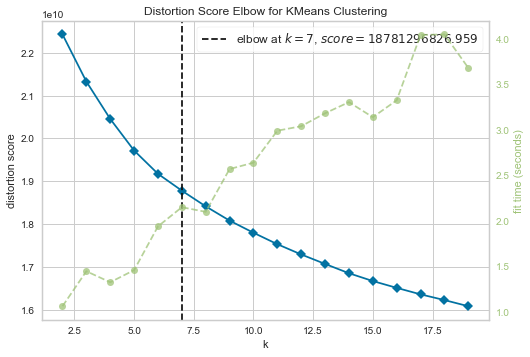

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

In [27]:
kelbow_visualizer(KMeans(random_state=42), mnist_X_test, k=(2, 20))

2 0.10099769558506418


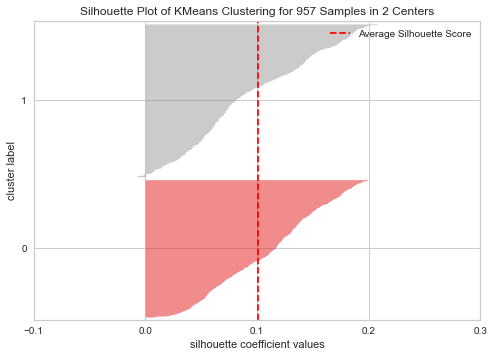

3 0.09774525137822242


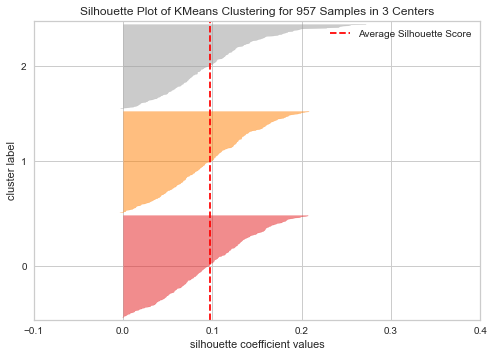

4 0.09910102797010842


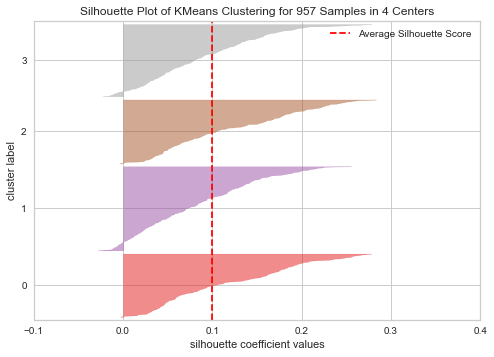

5 0.10595687400495585


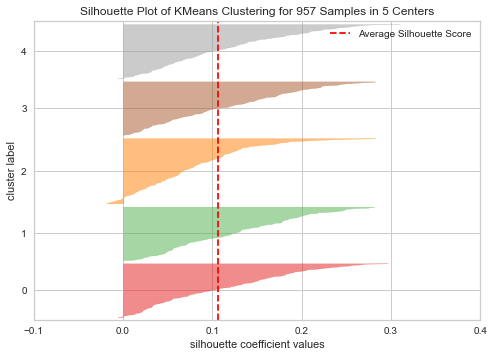

6 0.11147367331100325


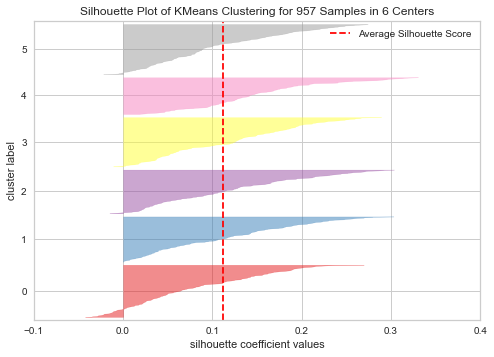

7 0.11902330282046948


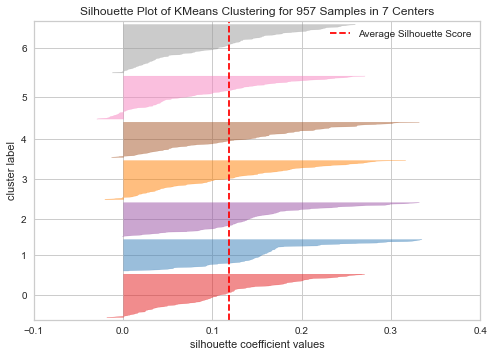

8 0.12841906063641312


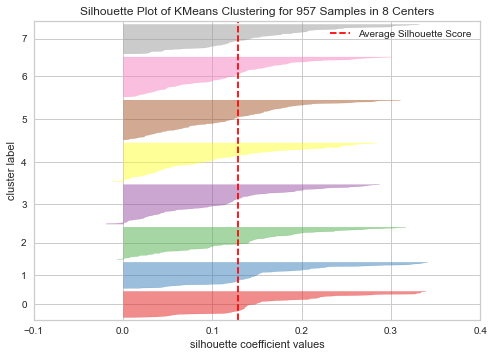

9 0.12787997193055994


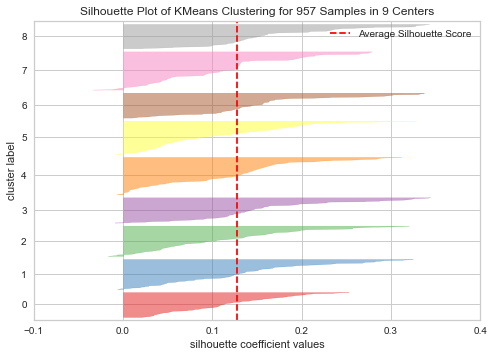

10 0.135076039403339


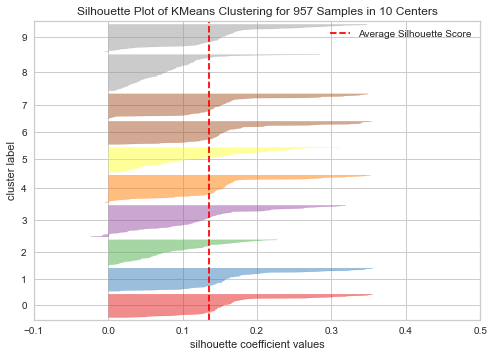

11 0.13642993849205665


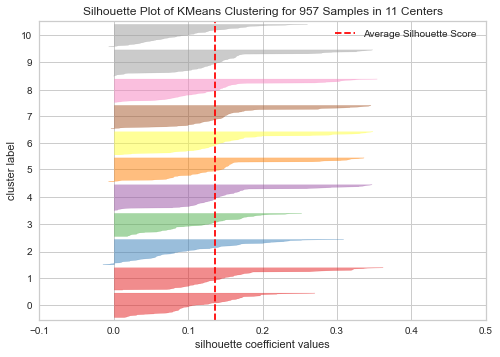

12 0.13083014615321312


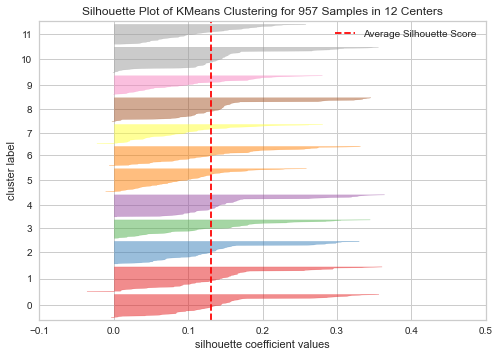

13 0.12082472472911474


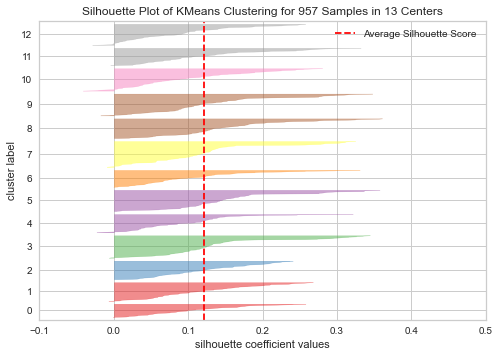

14 0.11429216174046113


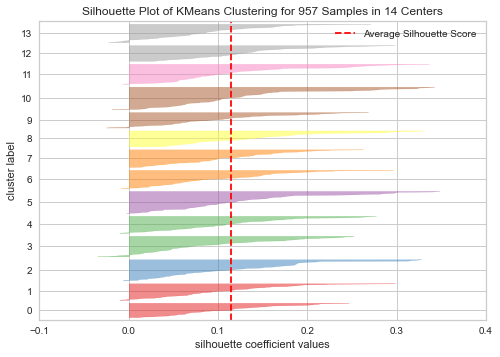

15 0.11161984511873561


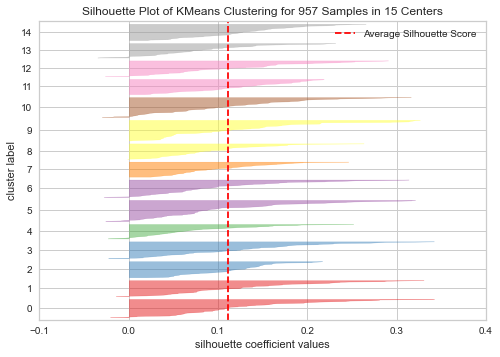

16 0.11015327053894891


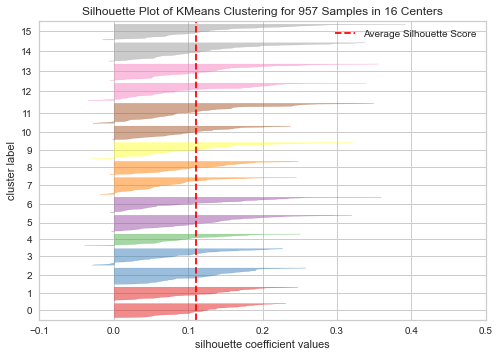

17 0.10947894986168334


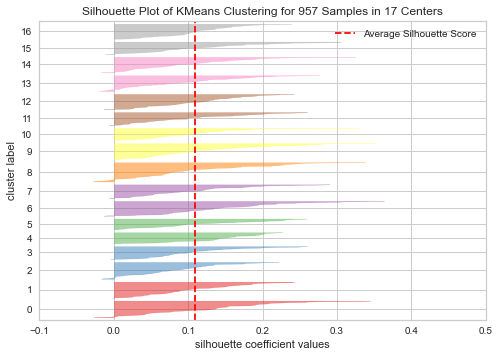

18 0.1104578989246558


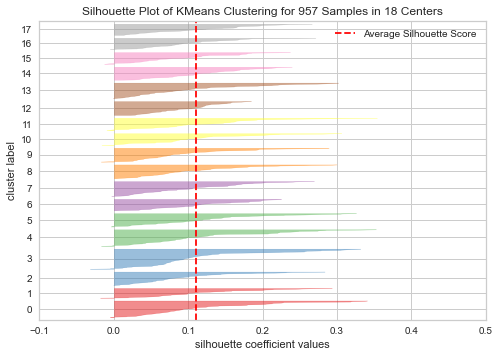

19 0.10555143561104427


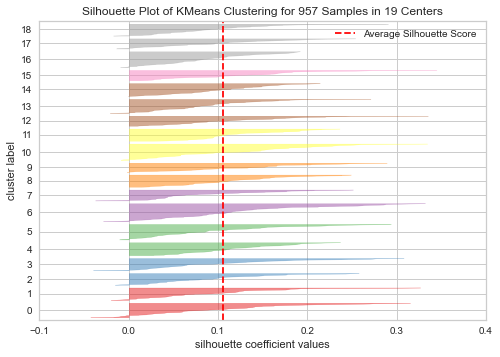

In [368]:
for k in range(2, 20):
    model = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=42))
    model.fit(tic_tac_toe_data_nolables)
    print(k, model.silhouette_score_)
    model.show()
#     silhouette_score()

2 0.08704742108043957


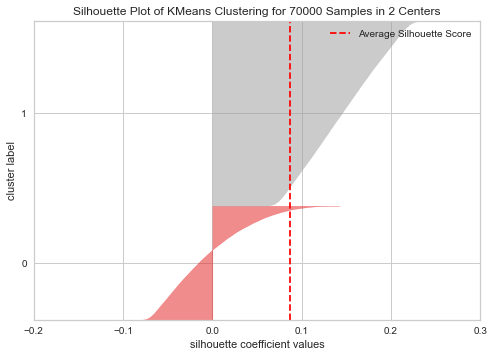

KeyboardInterrupt: 

In [359]:
%%time
for k in range(2, 20):
    model = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=42))
    model.fit(mnist_X)
    print(k, model.silhouette_score_)
    model.show()

5 0.06697707400070504


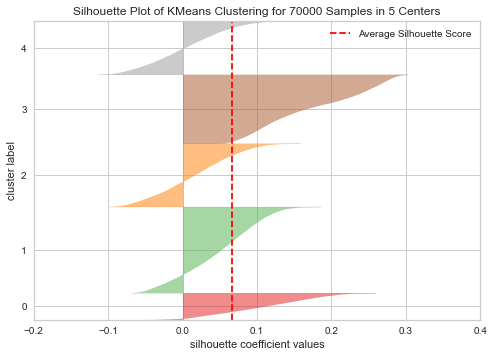

7 0.06664589541982927


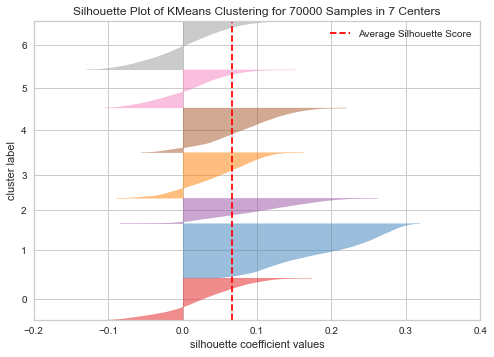

9 0.05683381826333592


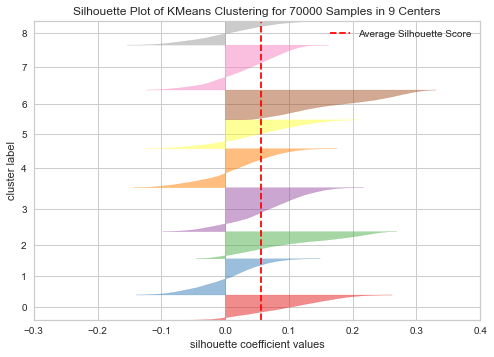

11 0.05836351154790604


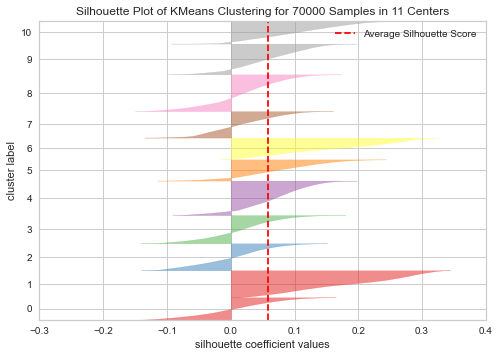

13 0.060122624778168404


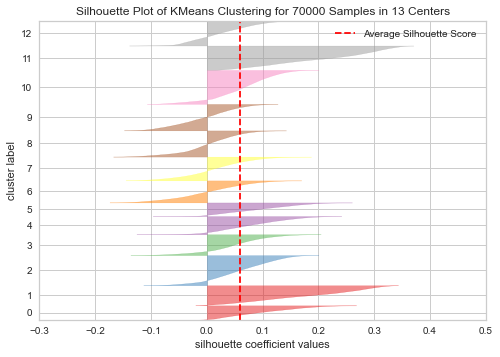

15 0.06288031255997435


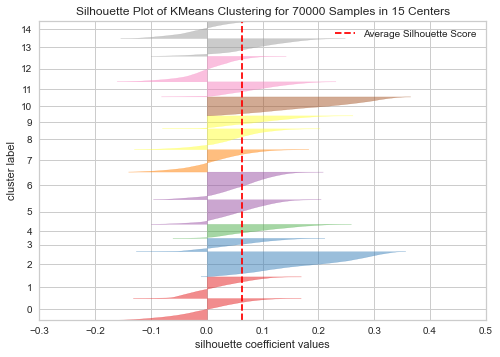

17 0.06475935325372535


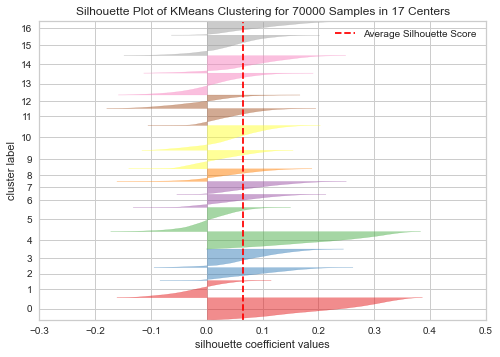

19 0.06698524811086343


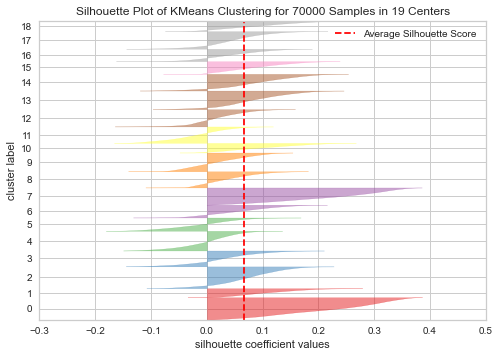

Wall time: 27min 13s


In [360]:
%%time
for k in range(5, 20, 2):
    model = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=42))
    model.fit(mnist_X)
    print(k, model.silhouette_score_)
    model.show()

19 0.06645552817813634


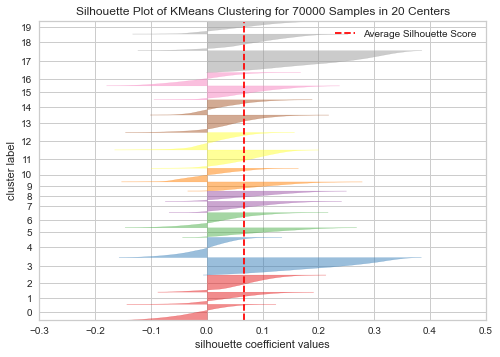

Wall time: 3min 47s


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 70000 Samples in 20 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [366]:
%%time
model = SilhouetteVisualizer(KMeans(n_clusters=20, random_state=42))
model.fit(mnist_X)
print(k, model.silhouette_score_)
model.show()

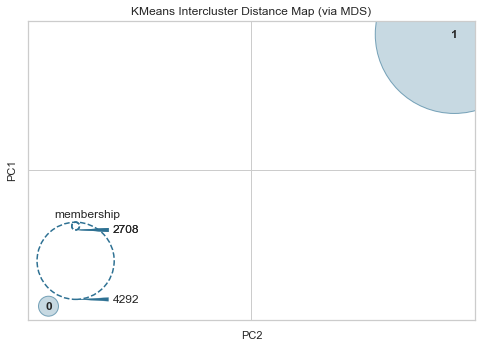

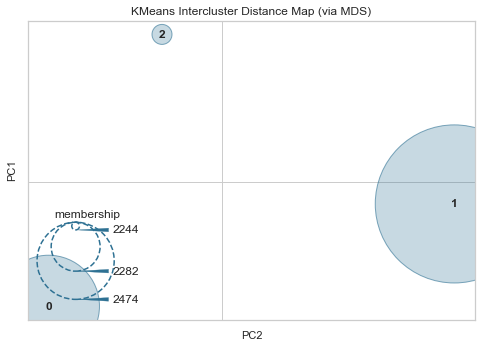

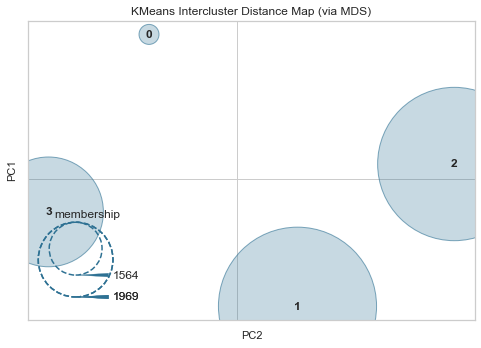

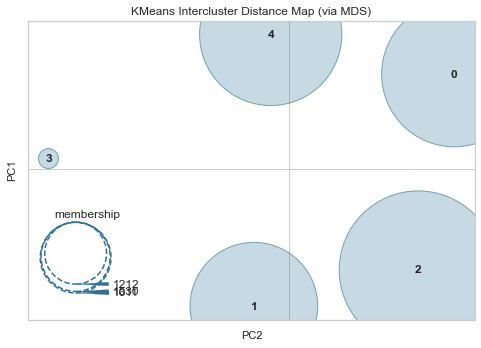

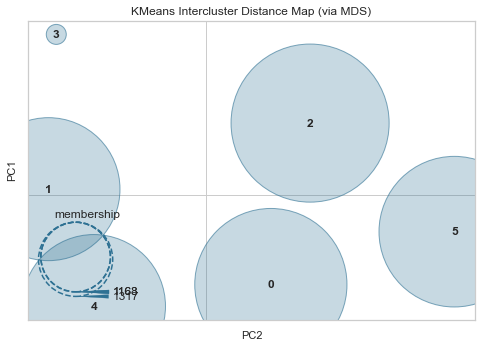

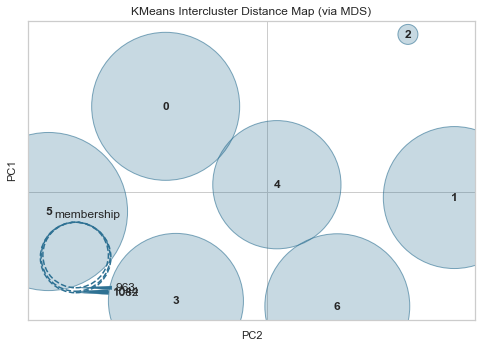

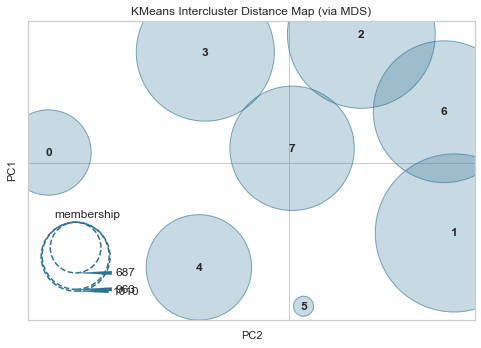

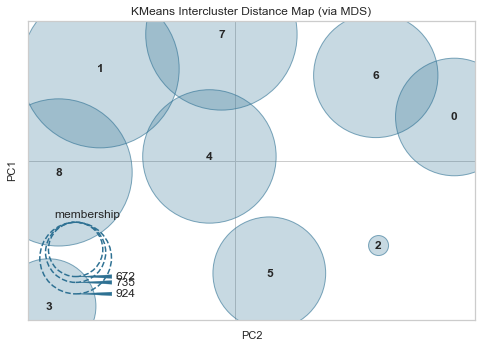

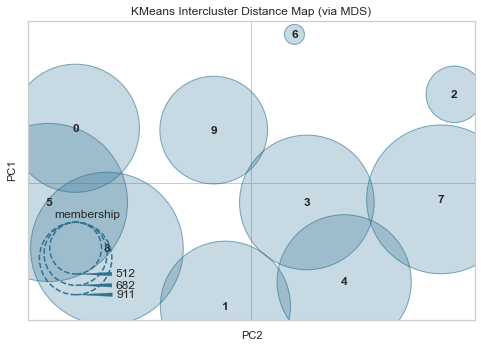

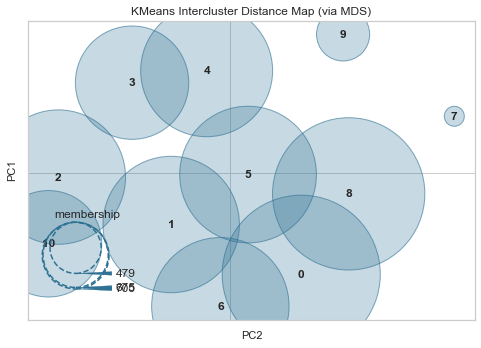

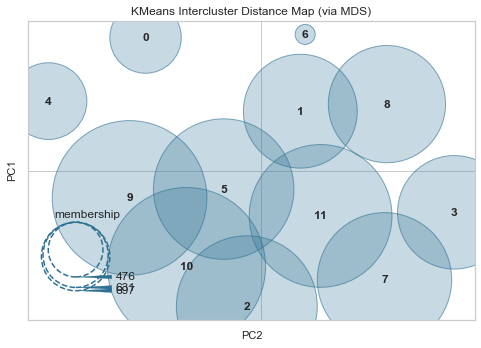

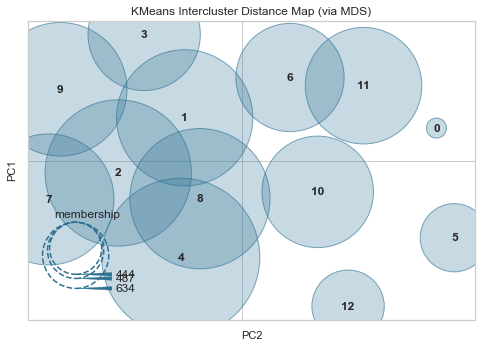

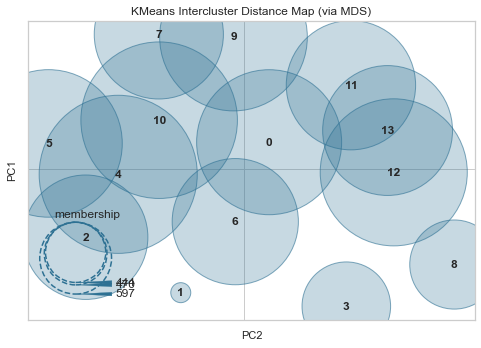

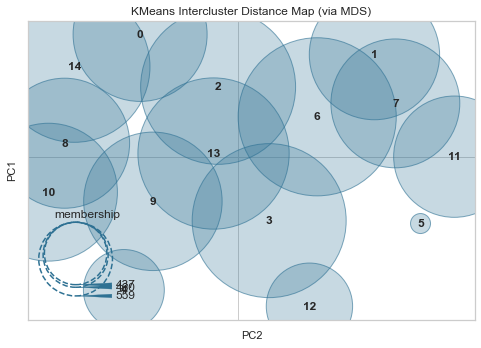

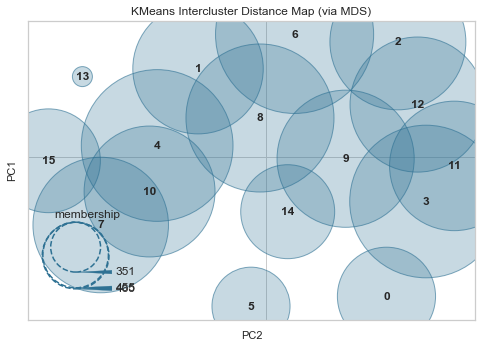

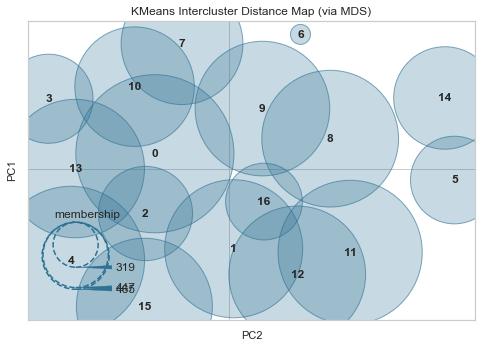

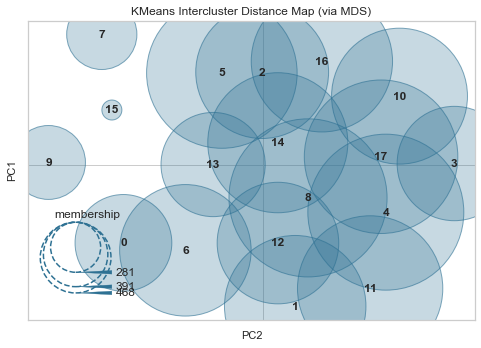

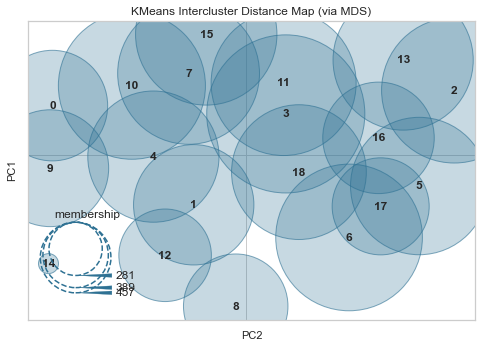

In [32]:
from yellowbrick.cluster import InterclusterDistance
for k in range(2, 20):
    model = InterclusterDistance(KMeans(n_clusters=k, random_state=42))
    model.fit(mnist_X_test)
    model.show()

C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


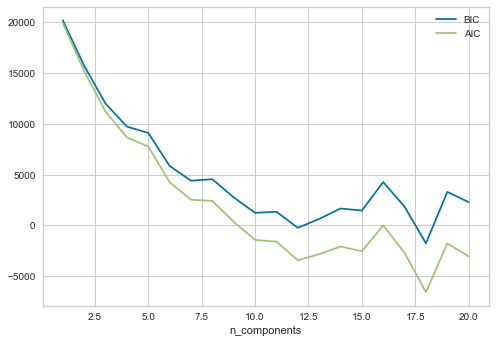

In [38]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(tic_tac_toe_data_nolables) for n in n_components]
plt.plot(n_components, [m.bic(tic_tac_toe_data_nolables) for m in models], label='BIC')
plt.plot(n_components, [m.aic(tic_tac_toe_data_nolables) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

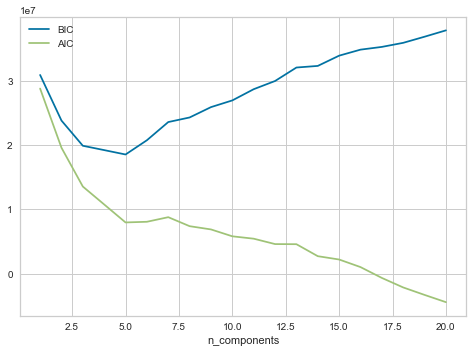

In [39]:
n_components = np.arange(1, 21)
m_models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(mnist_X_test) for n in n_components]
plt.plot(n_components, [m.bic(mnist_X_test) for m in models], label='BIC')
plt.plot(n_components, [m.aic(mnist_X_test) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [42]:
m_final_kmeans = KMeans(n_clusters=7)
m_final_kmeans.fit(mnist_X, mnist_y)

KMeans(n_clusters=7)

0 0
0 1
0 2
1 0
1 1
1 2
2 0


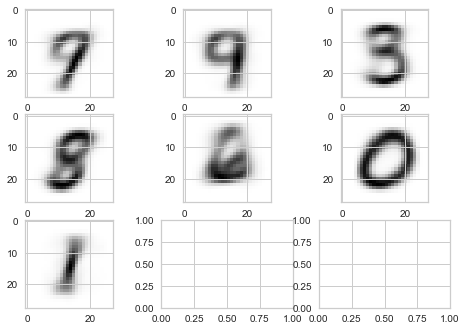

In [62]:
import matplotlib.gridspec as gridspec
n_cols = 3
n_rows = 3 #len(m_final_kmeans.cluster_centers_) % 3 + 1
gspec = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.2)
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(n_rows, n_cols)
for i in range(len(m_final_kmeans.cluster_centers_)):
    ax = axs[row, col]
    cen = m_final_kmeans.cluster_centers_[i]
    print(row, col)
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1

In [63]:
m_final_kmeans = KMeans(n_clusters=10)
m_final_kmeans.fit(mnist_X, mnist_y)

KMeans(n_clusters=10)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0


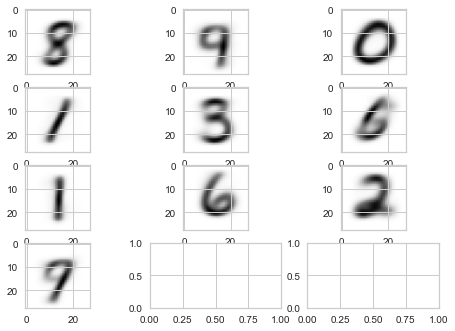

In [65]:
import matplotlib.gridspec as gridspec
n_cols = 3
n_rows = 4
gspec = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.2)
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(n_rows, n_cols)
for i in range(len(m_final_kmeans.cluster_centers_)):
    ax = axs[row, col]
    cen = m_final_kmeans.cluster_centers_[i]
    print(row, col)
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1

In [66]:
m_final_kmeans = KMeans(n_clusters=11)
m_final_kmeans.fit(mnist_X, mnist_y)

KMeans(n_clusters=11)

IndexError: index 2 is out of bounds for axis 0 with size 2

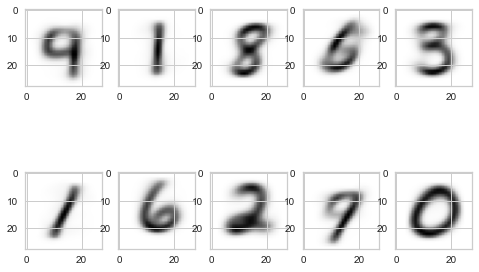

In [73]:
import matplotlib.gridspec as gridspec
n_cols = 5
n_rows = 2
gspec = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.2)
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(n_rows, n_cols)
for i in range(len(m_final_kmeans.cluster_centers_)):
    ax = axs[row, col]
    cen = m_final_kmeans.cluster_centers_[i]
#     print(row, col)
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1

In [69]:
m_final_gmm = GaussianMixture(5, covariance_type='full', random_state=0)
m_final_gmm.fit(mnist_X, mnist_y)

GaussianMixture(n_components=5, random_state=0)

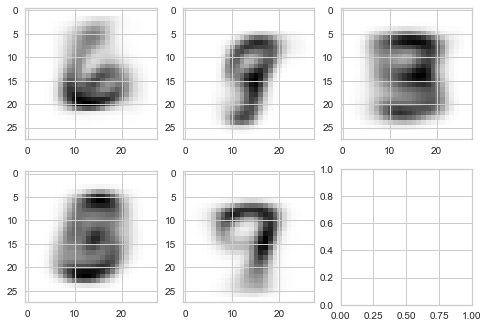

In [71]:
import matplotlib.gridspec as gridspec
n_cols = 3
n_rows = 2
gspec = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.2)
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(n_rows, n_cols)
for i in range(len(m_final_gmm.means_)):
    ax = axs[row, col]
    cen = m_final_gmm.means_[i]
#     print(row, col)
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1

In [72]:
m_final_gmm = GaussianMixture(20, covariance_type='full', random_state=0)
m_final_gmm.fit(mnist_X, mnist_y)

GaussianMixture(n_components=20, random_state=0)

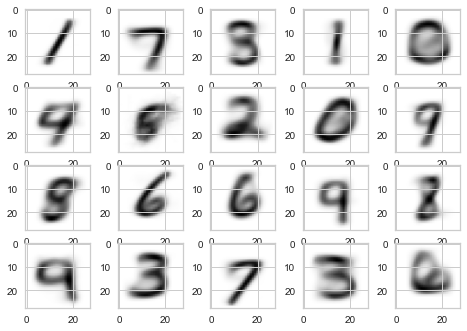

In [74]:
import matplotlib.gridspec as gridspec
n_cols = 5
n_rows = 4
gspec = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.2)
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(n_rows, n_cols)
for i in range(len(m_final_gmm.means_)):
    ax = axs[row, col]
    cen = m_final_gmm.means_[i]
#     print(row, col)
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1

In [75]:
m_final_gmm = GaussianMixture(10, covariance_type='full', random_state=0)
m_final_gmm.fit(mnist_X, mnist_y)

GaussianMixture(n_components=10, random_state=0)

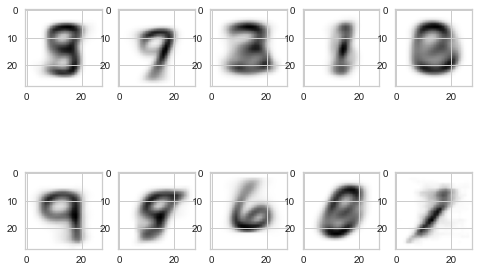

In [76]:
import matplotlib.gridspec as gridspec
n_cols = 5
n_rows = 2
gspec = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.2)
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(n_rows, n_cols)
for i in range(len(m_final_gmm.means_)):
    ax = axs[row, col]
    cen = m_final_gmm.means_[i]
#     print(row, col)
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1

In [77]:
from sklearn.manifold import TSNE

In [78]:
m_final_kmeans = KMeans(n_clusters=2)
m_final_kmeans.fit(tic_tac_toe_data_nolables, tic_tac_toe_data.positive)

KMeans(n_clusters=2)

In [124]:
tsne = TSNE(n_components=2, perplexity=25, random_state=42).fit_transform(tic_tac_toe_data_nolables)
ts_df = pd.DataFrame(tsne, columns=['x', 'y'])
# plt.scatter(ts_df.x, ts_df.y)

KeyError: 'positive'

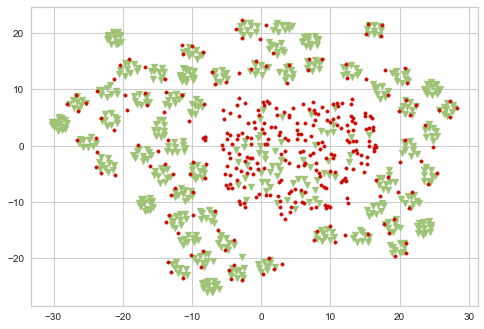

In [125]:
ts_df = pd.DataFrame(tsne, columns=['xt', 'y'])
ts_df = pd.concat([ts_df, tic_tac_toe_data], axis=1)
c1 = ts_df[ts_df["positive"] == 1]
plt.scatter(c1.xt, c1.y, color='g', marker='v')
c2 = ts_df[ts_df["positive"] == 0]
plt.scatter(c2.xt, c2.y, color='r', marker='.')

In [81]:
from sklearn.decomposition import PCA

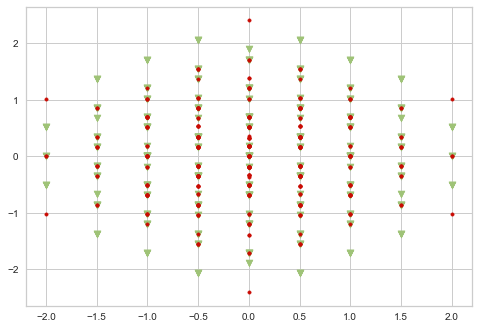

In [123]:
pca = PCA(n_components=2, random_state=42).fit_transform(tic_tac_toe_data_nolables)
pca_pd = pd.DataFrame(pca, columns=['xt', 'y'])
pca_pd = pd.concat([pca_pd, tic_tac_toe_data], axis=1)
# plt.scatter(pca_pd[pca_pd["positive"] == 1].x, pca_pd[pca_pd["positive"] == 1].y)
# pca_pd.info()
c1 = pca_pd[pca_pd["positive"] == 1]
plt.scatter(c1.xt, c1.y, color='g', marker='v')
c2 = pca_pd[pca_pd["positive"] == 0]
plt.scatter(c2.xt, c2.y, color='r', marker='.')

In [130]:
pd_prediction = pd.DataFrame(m_final_kmeans.predict(tic_tac_toe_data_nolables), columns=['positive'])

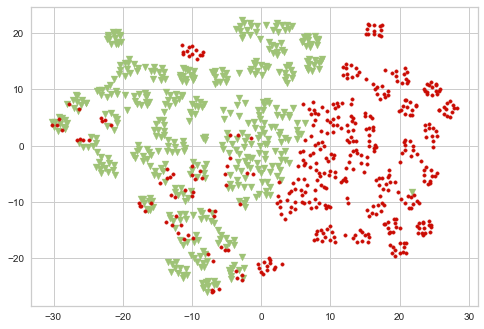

In [131]:
ts_df = pd.DataFrame(tsne, columns=['xt', 'y'])
ts_df = pd.concat([ts_df, pd_prediction], axis=1)
c1 = ts_df[ts_df["positive"] == 1]
plt.scatter(c1.xt, c1.y, color='g', marker='v')
c2 = ts_df[ts_df["positive"] == 0]
plt.scatter(c2.xt, c2.y, color='r', marker='.')

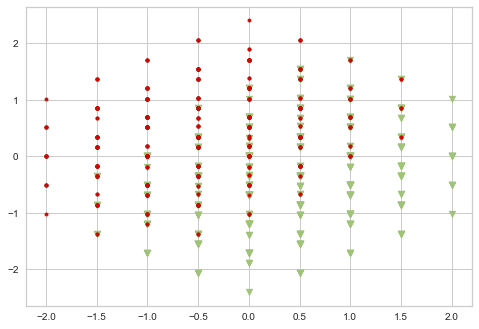

In [132]:
# pca = PCA(n_components=2, random_state=42).fit_transform(tic_tac_toe_data_nolables)
pca_pd = pd.DataFrame(pca, columns=['xt', 'y'])
pca_pd = pd.concat([pca_pd, pd_prediction], axis=1)
# plt.scatter(pca_pd[pca_pd["positive"] == 1].x, pca_pd[pca_pd["positive"] == 1].y)
# pca_pd.info()
c1 = pca_pd[pca_pd["positive"] == 1]
plt.scatter(c1.xt, c1.y, color='g', marker='v')
c2 = pca_pd[pca_pd["positive"] == 0]
plt.scatter(c2.xt, c2.y, color='r', marker='.')

In [133]:
m_final_kmeans = KMeans(n_clusters=8)
m_final_kmeans.fit(tic_tac_toe_data_nolables, tic_tac_toe_data.positive)

KMeans()

In [134]:
pd_prediction = pd.DataFrame(m_final_kmeans.predict(tic_tac_toe_data_nolables), columns=['positive'])

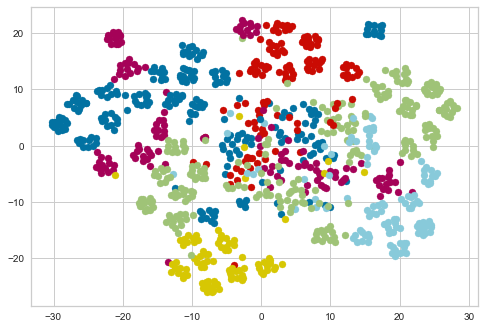

In [137]:
classes = np.unique(pd_prediction)

ts_df = pd.DataFrame(tsne, columns=['xt', 'y'])
ts_df = pd.concat([ts_df, pd_prediction], axis=1)
for c in classes:
    c1 = ts_df[ts_df["positive"] == c]
    plt.scatter(c1.xt, c1.y)

In [138]:
t_final_g = GaussianMixture(18, covariance_type='full', random_state=0).fit(tic_tac_toe_data_nolables)

In [139]:
pd_prediction = pd.DataFrame(t_final_g.predict(tic_tac_toe_data_nolables), columns=['positive'])

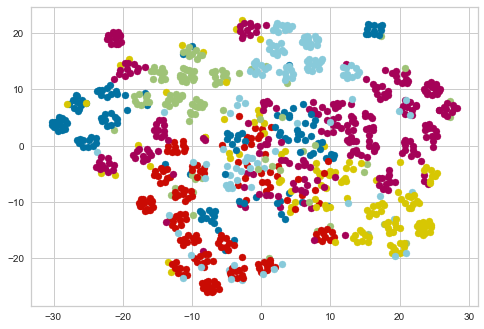

In [140]:
classes = np.unique(pd_prediction)

ts_df = pd.DataFrame(tsne, columns=['xt', 'y'])
ts_df = pd.concat([ts_df, pd_prediction], axis=1)
for c in classes:
    c1 = ts_df[ts_df["positive"] == c]
    plt.scatter(c1.xt, c1.y)

## Part 2 experiments

### PCA

In [141]:
from sklearn.decomposition import PCA

In [142]:
mnist_pca = PCA(n_components=150).fit(mnist_X_train)

In [146]:
mnist_X_proj = mnist_pca.transform(mnist_X_test)

In [147]:
mnist_X_proj.shape

(7000, 150)

In [149]:
mnist_X_rev = mnist_pca.inverse_transform(mnist_X_proj)
mnist_X_rev.shape

(7000, 784)

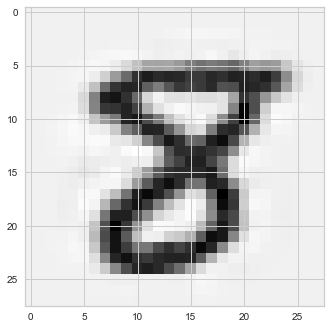

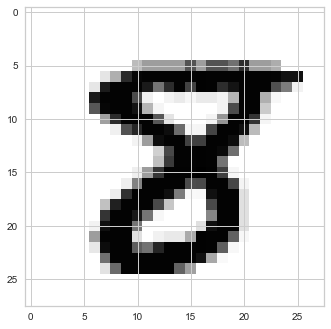

In [174]:
plt.figure()
plt.imshow(mnist_X_rev[0].reshape([28,28]))
plt.figure()
plt.imshow(mnist_X_test.iloc[0].values.reshape([28,28]))

In [175]:
from sklearn.model_selection import cross_val_score

In [179]:
%%time
np.mean(cross_val_score(mnist_pca, mnist_X_test))

Wall time: 2.69 s


-3583.854511641297

In [186]:
%%time
max_componenets = mnist_X_test.shape[1]
# [i for i in range(1, max_componenets, 5)]
pca_scores = {}
pca_ex = PCA(svd_solver='full')
for n_comp in range(1, max_componenets, 5):
    pca_ex.n_components = n_comp
    pca_scores[n_comp] = np.mean(cross_val_score(pca_ex, mnist_X_test))

Wall time: 8min 59s


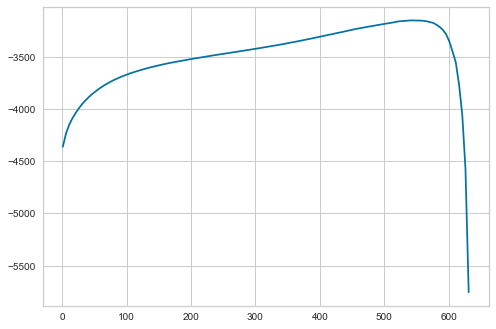

In [203]:
plt.plot(list(pca_scores.keys())[:-30], list(pca_scores.values())[:-30])
# list(pca_scores.values())[:-30]

In [208]:
%%time
pca_ex = PCA(svd_solver='full', n_components='mle')
pca_ex.fit(mnist_X_test)
pca_ex.n_components

Wall time: 2min 55s


'mle'

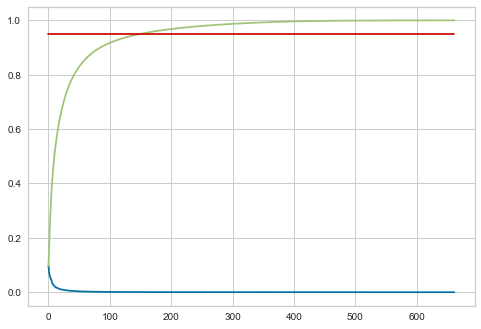

In [241]:
pca_ex.explained_variance_ratio_.shape
plt.plot(range(pca_ex.explained_variance_ratio_.shape[0]), pca_ex.explained_variance_ratio_)
plt.plot(range(pca_ex.explained_variance_ratio_.shape[0]), np.cumsum(pca_ex.explained_variance_ratio_))
plt.plot(range(pca_ex.explained_variance_ratio_.shape[0]), [0.95 for i in range(pca_ex.explained_variance_ratio_.shape[0])])
# plt.plot(range(pca_ex.explained_variance_ratio_.shape[0]), pca_ex.explained_variance_)

In [242]:
%%time
pca_mnist_final = PCA(n_components=150).fit(mnist_X)

Wall time: 4.72 s


In [377]:
pca_ex_t = PCA(svd_solver='full', n_components='mle')
pca_ex_t.fit(tic_tac_toe_data_nolables)
pca_ex_t.n_components

'mle'

In [379]:
pca_ex_t = PCA(svd_solver='full', n_components=9)
pca_ex_t.fit(tic_tac_toe_data_nolables)
pca_ex_t.n_components

9

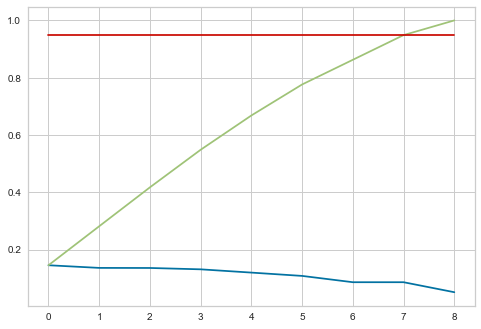

In [380]:
pca_ex_t.explained_variance_ratio_.shape
plt.plot(range(pca_ex_t.explained_variance_ratio_.shape[0]), pca_ex_t.explained_variance_ratio_)
plt.plot(range(pca_ex_t.explained_variance_ratio_.shape[0]), np.cumsum(pca_ex_t.explained_variance_ratio_))
plt.plot(range(pca_ex_t.explained_variance_ratio_.shape[0]), [0.95 for i in range(pca_ex_t.explained_variance_ratio_.shape[0])])
# plt.plot(range(pca_ex.explained_variance_ratio_.shape[0]), pca_ex.explained_variance_)

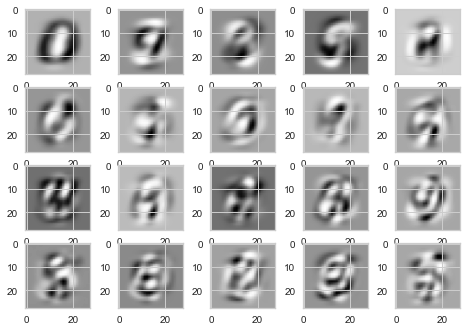

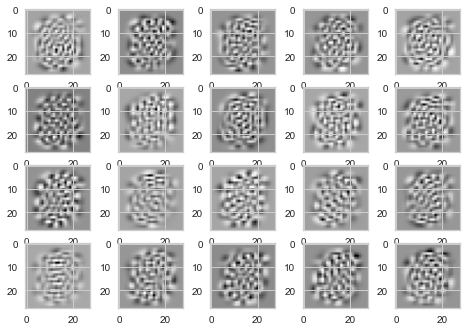

In [268]:
n_cols = 5
# gspec = gridspec.GridSpec(1, 10, wspace=0.1, hspace=0.1)
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(4, n_cols)
for i in range(20):
    ax = axs[row, col]
    cen = pca_mnist_final.components_[i]
#     print(row, col)
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1
        
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(4, n_cols)
for i in range(-1, -21, -1):
    ax = axs[row, col]
    cen = pca_mnist_final.components_[i]
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1

### ICA

In [270]:
from scipy.stats import kurtosis
from sklearn.decomposition import FastICA

In [280]:
%%time
ica = FastICA(n_components=680, random_state=42).fit(mnist_X)
kurt = kurtosis(ica.components_, axis=1)
print(np.mean(kurt))

158.3188261956437
Wall time: 3min 50s


In [275]:
%%time
ica_range = range(1, 740, 10)
kurt_values = {}
for n_c in ica_range:
    ica = FastICA(n_components=n_c, random_state=42).fit(mnist_X)
    kurt = kurtosis(ica.components_, axis=1)
    kurt_values[n_c] = np.mean(kurt)

C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the max

Wall time: 25min 59s


C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


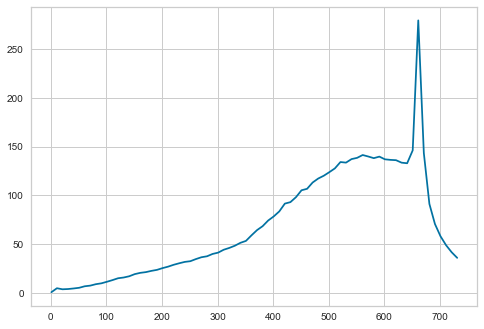

In [276]:
plt.plot(list(kurt_values.keys()), list(kurt_values.values()))

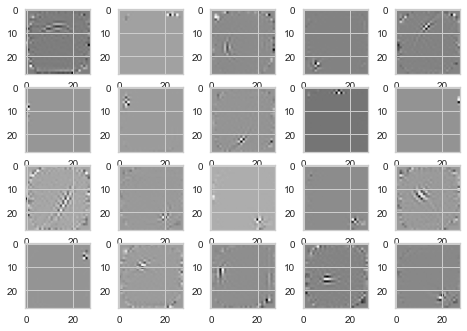

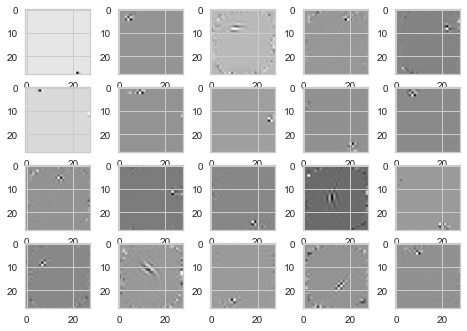

In [281]:
n_cols = 5
# gspec = gridspec.GridSpec(1, 10, wspace=0.1, hspace=0.1)
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(4, n_cols)
for i in range(20):
    ax = axs[row, col]
    cen = ica.components_[i]
#     print(row, col)
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1
        
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(4, n_cols)
for i in range(-1, -21, -1):
    ax = axs[row, col]
    cen = ica.components_[i]
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1

In [282]:
%%time
small_ica = FastICA(n_components=40, random_state=42).fit(mnist_X)
kurt = kurtosis(ica.components_, axis=1)
print(np.mean(kurt))

158.3188261956437
Wall time: 10.7 s


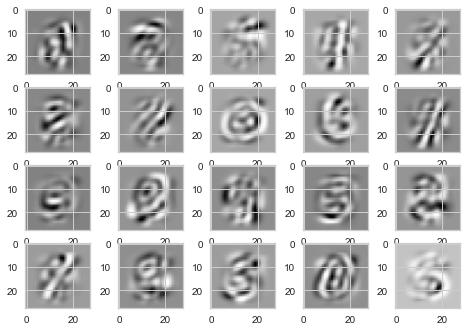

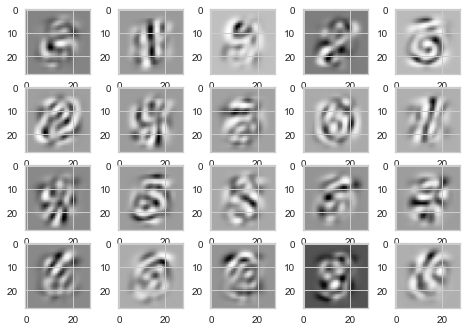

In [283]:
n_cols = 5
# gspec = gridspec.GridSpec(1, 10, wspace=0.1, hspace=0.1)
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(4, n_cols)
for i in range(20):
    ax = axs[row, col]
    cen = small_ica.components_[i]
#     print(row, col)
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1
        
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(4, n_cols)
for i in range(-1, -21, -1):
    ax = axs[row, col]
    cen = small_ica.components_[i]
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1

In [373]:
%%time
ica_range = range(1, 10, 1)
kurt_values_t = {}
for n_c in ica_range:
    ica_t = FastICA(n_components=n_c, random_state=42).fit(tic_tac_toe_data_nolables)
    kurt = kurtosis(ica_t.components_, axis=1)
    kurt_values_t[n_c] = np.mean(kurt)

Wall time: 55 ms


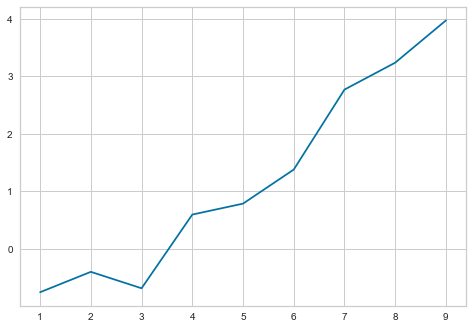

In [374]:
plt.plot(list(kurt_values_t.keys()), list(kurt_values_t.values()))

## Randomized Projection

In [284]:
# basic random projection
from sklearn.random_projection import SparseRandomProjection

In [305]:
n_components = 10
model = SparseRandomProjection(n_components=n_components, random_state=42)
model.fit(mnist_X)
x_reduced = model.transform(mnist_X)
# x_reconstructed = model.inverse_transform(x_reduced)
p_inv = np.linalg.pinv(model.components_.todense())
x_reconstructed = (p_inv @ x_reduced.T).T
# mse = np.mean((mnist_X - x_reconstructed) ** 2)
mse = np.mean((mnist_X - x_reconstructed) ** 2)
print(np.mean(mse))

7218.443367256136


In [306]:
%%time
n_range = range(1, 740, 10)
mse_values = {}
for n_c in n_range:
    print('evaluating ', n_c)
    model = SparseRandomProjection(n_components=n_c, random_state=42)
    model.fit(mnist_X)
    x_reduced = model.transform(mnist_X)
    # x_reconstructed = model.inverse_transform(x_reduced)
    p_inv = np.linalg.pinv(model.components_.todense())
    x_reconstructed = (p_inv @ x_reduced.T).T
    # mse = np.mean((mnist_X - x_reconstructed) ** 2)
    mse = np.mean((mnist_X - x_reconstructed) ** 2)
    mse_values[n_c] = np.mean(mse)

evaluating  1
evaluating  11
evaluating  21
evaluating  31
evaluating  41
evaluating  51
evaluating  61
evaluating  71
evaluating  81
evaluating  91
evaluating  101
evaluating  111
evaluating  121
evaluating  131
evaluating  141
evaluating  151
evaluating  161
evaluating  171
evaluating  181
evaluating  191
evaluating  201
evaluating  211
evaluating  221
evaluating  231
evaluating  241
evaluating  251
evaluating  261
evaluating  271
evaluating  281
evaluating  291
evaluating  301
evaluating  311
evaluating  321
evaluating  331
evaluating  341
evaluating  351
evaluating  361
evaluating  371
evaluating  381
evaluating  391
evaluating  401
evaluating  411
evaluating  421
evaluating  431
evaluating  441
evaluating  451
evaluating  461
evaluating  471
evaluating  481
evaluating  491
evaluating  501
evaluating  511
evaluating  521
evaluating  531
evaluating  541
evaluating  551
evaluating  561
evaluating  571
evaluating  581
evaluating  591
evaluating  601
evaluating  611
evaluating  621
eva

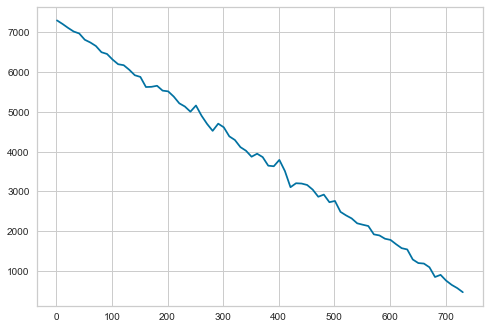

In [307]:
plt.plot(list(mse_values.keys()), list(mse_values.values()))

In [321]:
n_components = 500
rp_model = SparseRandomProjection(n_components=n_components, random_state=42)
rp_model.fit(mnist_X)
x_reduced = rp_model.transform(mnist_X)
# x_reconstructed = model.inverse_transform(x_reduced)
p_inv = np.linalg.pinv(rp_model.components_.todense())
x_reconstructed = (p_inv @ x_reduced.T).T
# mse = np.mean((mnist_X - x_reconstructed) ** 2)
mse = np.mean((mnist_X - x_reconstructed) ** 2)
print(np.mean(mse))

2511.3949640802325


In [317]:
rp_model.components_.todense().shape

(500, 784)

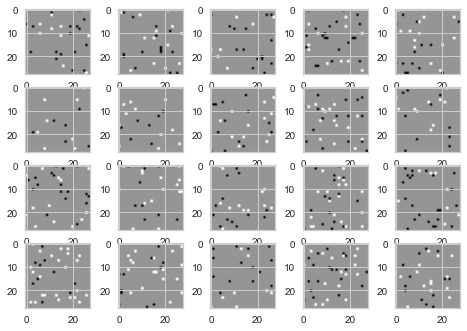

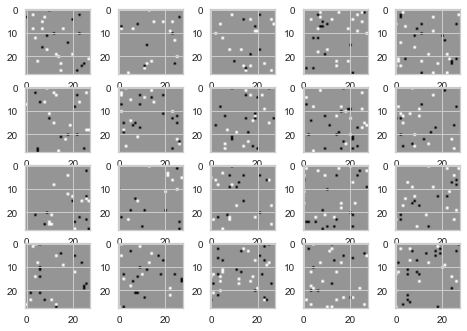

In [322]:
n_cols = 5
# gspec = gridspec.GridSpec(1, 10, wspace=0.1, hspace=0.1)
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(4, n_cols)
components = rp_model.components_.todense()
for i in range(20):
    ax = axs[row, col]
    cen = components[i]
#     print(row, col)
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1
        
fig = plt.figure()
row = 0
col = 0
axs = fig.subplots(4, n_cols)
for i in range(-1, -21, -1):
    ax = axs[row, col]
    cen = components[i]
    ax.imshow(cen.reshape((28, 28)))
    col += 1
    if col == n_cols:
        col = 0
        row += 1

In [381]:
%%time
n_range = range(1, 10, 1)
mse_values_t = {}
for n_c in n_range:
#     print('evaluating ', n_c)
    model = SparseRandomProjection(n_components=n_c, random_state=42)
    model.fit(tic_tac_toe_data_nolables)
    x_reduced = model.transform(tic_tac_toe_data_nolables)
    # x_reconstructed = model.inverse_transform(x_reduced)
    p_inv = np.linalg.pinv(model.components_.todense())
    x_reconstructed = (p_inv @ x_reduced.T).T
    # mse = np.mean((mnist_X - x_reconstructed) ** 2)
    mse = np.mean((tic_tac_toe_data_nolables - x_reconstructed) ** 2)
    mse_values_t[n_c] = np.mean(mse)

Wall time: 40 ms


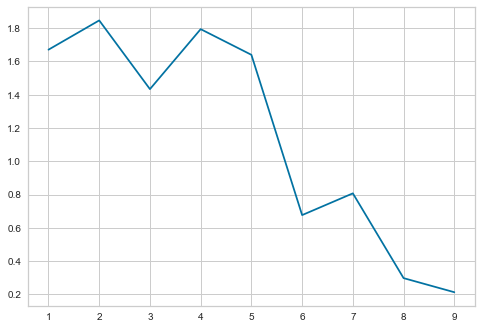

In [382]:
plt.plot(list(mse_values_t.keys()), list(mse_values_t.values()))

### LDA

In [323]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [343]:
lda_model = LinearDiscriminantAnalysis(n_components=1).fit(mnist_X_train, mnist_y_train)

In [335]:
from sklearn.metrics import classification_report

In [344]:
predictions = lda_model.predict(mnist_X_test)
print(classification_report(mnist_y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       683
           1       0.85      0.96      0.91       800
           2       0.89      0.81      0.85       674
           3       0.84      0.83      0.84       760
           4       0.84      0.90      0.87       611
           5       0.82      0.82      0.82       658
           6       0.93      0.90      0.91       677
           7       0.92      0.84      0.88       724
           8       0.82      0.78      0.80       693
           9       0.82      0.88      0.85       720

    accuracy                           0.87      7000
   macro avg       0.87      0.87      0.87      7000
weighted avg       0.87      0.87      0.87      7000



In [345]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [346]:
rf_clf = RandomForestClassifier()
rf_clf.fit(mnist_X_train, mnist_y_train)
rf_dr_model = SelectFromModel(rf_clf, prefit=True)
x_new = rf_dr_model.transform(mnist_X_test)
x_new.shape

(7000, 272)

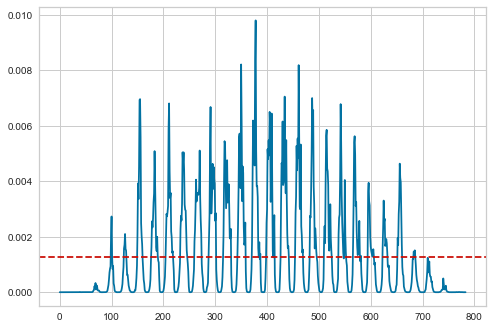

In [358]:
fig, ax = plt.subplots()
ax.plot( rf_clf.feature_importances_)
ax.axhline(np.mean(rf_clf.feature_importances_), c ='r', linestyle='--', label='mean')

In [371]:
rf_clf_t = RandomForestClassifier()
rf_clf_t.fit(tic_tac_toe_data_nolables, tic_tac_toe_data.positive)
rf_dr_model_t = SelectFromModel(rf_clf_t, prefit=True)
x_new = rf_dr_model_t.transform(tic_tac_toe_data_nolables)
x_new.shape

(957, 4)

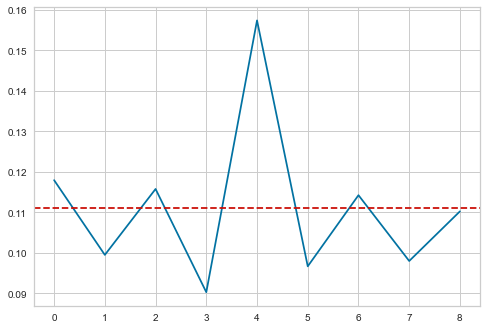

In [372]:
fig, ax = plt.subplots()
ax.plot( rf_clf_t.feature_importances_)
ax.axhline(np.mean(rf_clf_t.feature_importances_), c ='r', linestyle='--', label='mean')